In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../dataset/kc_tax.csv")
data.tail(10)

,TaxAssessedValue,SqFtTotLiving,ZipCode
498239,427000.0,2410,98056.0
498240,247000.0,990,98056.0
498241,247000.0,980,98056.0
498242,312000.0,1660,98056.0
498243,392000.0,2570,98056.0
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0
498248,286000.0,1310,98056.0


In [12]:
impuestos_filtrados = data.loc[(data.TaxAssessedValue<500_000) & (data.SqFtTotLiving>100)]
impuestos_filtrados

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


Text(0, 0.5, 'Tax-Assessed Value')

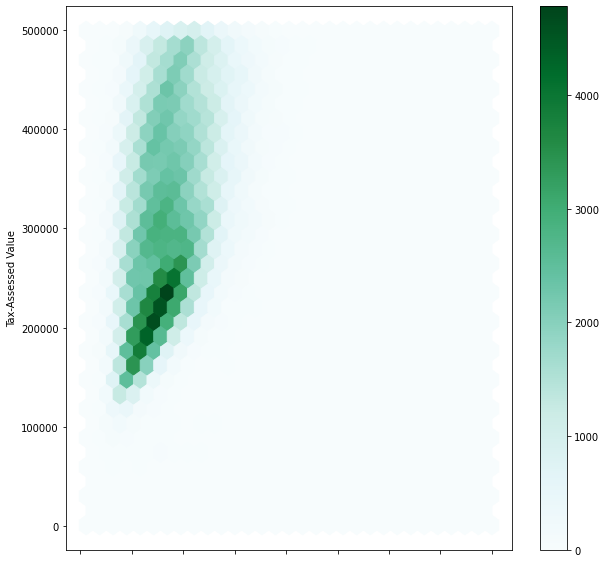

In [23]:
ax = impuestos_filtrados.plot.hexbin(x="SqFtTotLiving",y="TaxAssessedValue",gridsize=30,figsize=(10,10))

ax.set_xlabel("Square feet to living")
ax.set_ylabel("Tax-Assessed Value")